In [1]:
# Design State Observer

import control
from control import ctrb, obsv, place

import numpy as np
from numpy.linalg import eig, matrix_rank
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# Example 0
A = np.array([[0, 1], 
              [0, 0]])
B = np.array([[0], 
              [1]])
C = np.array([[1, 0]])

#print(A)

In [3]:
# Compute eigenvalues, eigenvectors
w,v = eig(A)
print('eigenvalues:', w)

eigenvalues: [0. 0.]


In [4]:
# Observability matrix
W_o=obsv(A, C)
matrix_rank(W_o)

np.int64(2)

In [5]:
# Design L s.t. A+LC is stable
desired_observer_poles = [-1, -2]
L = -place(A.T, C.T, desired_observer_poles).T

# confirm desired eigenvalues
#print(eig(A+L*C))
print(L)

[[-3.]
 [-2.]]


In [7]:
# Closed-loop system matrix
A_cl = np.block([
    [A,           np.zeros_like(A)],
    [-L @ C,      A + L @ C]
])

print(A_cl)

w_cl,v_cl = eig(A_cl)
print('eigenvalues:', w_cl)

[[ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 3.  0. -3.  1.]
 [ 2.  0. -2.  0.]]
eigenvalues: [-2. -1.  0.  0.]


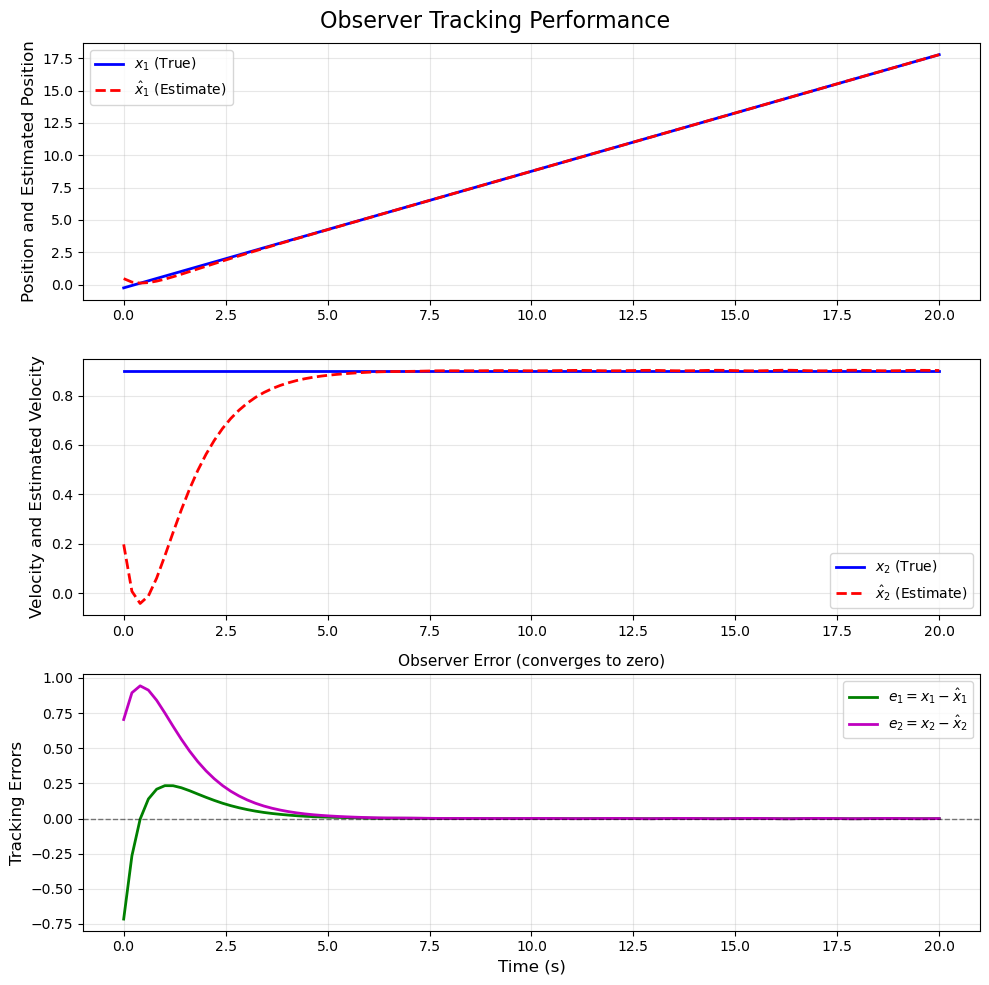

In [8]:
# Plot
def f(t, x):
    return A_cl @ x

t0, t1 = 0, 20                # start and end
t_span = (t0, t1)
t_eval = np.linspace(t0, t1, 100)  # the points of evaluation of solution             

# Initial condition
np.random.seed(42)  # For reproducibility
x0 = np.random.uniform(-1, 1, size=4)
#print(x0)

# Solve ODE using modern solve_ivp
sol = solve_ivp(f, t_span, x0, t_eval=t_eval)

#x = np.zeros((len(t), len(x0)))   # array for solution
#x[0,:] = x0
#r = integrate.ode(f).set_integrator("dopri5")  # choice of method
#r.set_initial_value(x0, t0)   # initial values

#for i in range(1, t.size):
#   x[i, :] = r.integrate(t[i]) # get one more value, add it to the array
#   if not r.successful():
#       raise RuntimeError("Could not integrate")
#plt.plot(t, x)
#plt.show()

# Plot results
# Calculate estimation errors
error_1 = sol.y[0] - sol.y[2]  # x1 - x3
error_2 = sol.y[1] - sol.y[3]  # x2 - x4

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Observer Tracking Performance', fontsize=16)

# Top: States comparison
axes[0].plot(sol.t, sol.y[0], 'b-', linewidth=2, label='$x_1$ (True)')
axes[0].plot(sol.t, sol.y[2], 'r--', linewidth=2, label='$\\hat{x}_1$ (Estimate)')
axes[0].set_ylabel('Position and Estimated Position', fontsize=12)
axes[0].legend(loc='best')
axes[0].grid(True, alpha=0.3)

axes[1].plot(sol.t, sol.y[1], 'b-', linewidth=2, label='$x_2$ (True)')
axes[1].plot(sol.t, sol.y[3], 'r--', linewidth=2, label='$\\hat{x}_2$ (Estimate)')
axes[1].set_ylabel('Velocity and Estimated Velocity', fontsize=12)
axes[1].legend(loc='best')
axes[1].grid(True, alpha=0.3)

# Bottom: Tracking errors
axes[2].plot(sol.t, error_1, 'g-', linewidth=2, label='$e_1 = x_1 - \\hat{x}_1$')
axes[2].plot(sol.t, error_2, 'm-', linewidth=2, label='$e_2 = x_2 - \\hat{x}_2$')
axes[2].axhline(y=0, color='k', linestyle='--', alpha=0.5, linewidth=1)
axes[2].set_xlabel('Time (s)', fontsize=12)
axes[2].set_ylabel('Tracking Errors', fontsize=12)
axes[2].legend(loc='best')
axes[2].grid(True, alpha=0.3)
axes[2].set_title('Observer Error (converges to zero)', fontsize=11)

plt.tight_layout()
plt.show()